# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Zulfahmi M. Ardianto
- **Email:** a548ybm523@devacademy.id
- **ID Dicoding:** A548YBM523

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Berapa persen pelanggan yang belum melakukan pembelian dalam 3 bulan terakhir?
- Kota atau negara bagian mana yang memiliki jumlah pesanan terbanyak?
- Siapa pelanggan dengan total pembelian tertinggi?


## Import Semua Packages/Library yang Digunakan

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import geopandas as gpd
import urllib

## Data Wrangling

### Gathering Data

In [113]:
customers_df = pd.read_csv("/content/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Tabel customer berisi 2 ID, customer id sebagai id pelanggan saat memesan, customer unique id sebagai id dari pelanggan
- berisi kode pos dari pelanggan
- berisi kota dari pelanggan
- berisi negara bagian dari pelanggan

In [114]:
geolocation_df = pd.read_csv("/content/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- Tabel geolokasi berisi kode pos dari pelanggan
- berisi geolokasi latitude(garis lintang)
- berisi geolokasi longtitude(garis bujur)
- berisi kota dari pelanggan
- berisi negara bagian dari pelanggan

In [115]:
orders_df = pd.read_csv("/content/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Tabel orders berisi id pemesanan
- Tabel orders juga berisi id pelanggan
- Tabel orders berisi status pemesanan
- Tabel orders berisi waktu pembelian
- Tabel orders berisi waktu pemesanan disetujui
- Tabel orders berisi waktu pesanan dikirim kurir
- Tabel orders berisi waktu pesanan dikirim ke pelanggan
- Tabel orders berisi waktu estimasi pengiriman


In [116]:
order_items_df = pd.read_csv("/content/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**
- Tabel order_items berisi 4 yaitu, id pemesanan, id dari setiap item, id produk, dan id seller
- Tabel order_items berisi waktu pengiriman ke ekspedisi
- Tabel order_items berisi harga item
- Tabel order_items berisi harga diskon

In [117]:
order_payments_df = pd.read_csv("/content/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Tabel **order_payments** berisi ID pemesanan,
- payment_sequential, menunjukkan urutan transaksi jika ada lebih dari satu pembayaran untuk satu pesanan.
- payment_type, menunjukkan metode pembayaran seperti kartu kredit, transfer bank, atau voucher.
- payment_installments, menunjukkan jumlah pembayaran cicilan jika pelanggan memilih bayar bertahap.
- payment_value, menunjukkan jumlah uang yang dibayarkan untuk pesanan tersebut.

In [118]:
order_reviews_df = pd.read_csv("/content/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight:**
- Tabel order_review berisi review_id –> ID unik untuk setiap ulasan pelanggan.
- Tabel order_review berisi order_id –> ID unik dari pesanan yang diberikan ulasan.
- Tabel order_review berisi review_score –> Skor ulasan pelanggan (biasanya dalam rentang 1-5).
- Tabel order_review berisi review_comment_title –> Judul singkat dari ulasan (jika ada).
- Tabel order_review berisi review_comment_message –> Isi atau pesan ulasan yang diberikan pelanggan.
- Tabel order_review berisi review_creation_date – >Tanggal ulasan dibuat oleh pelanggan.
- Tabel order_review berisi review_answer_timestamp –> Waktu ketika ulasan mendapat respons (misalnya, dari penjual atau sistem).

In [119]:
products_df = pd.read_csv("/content/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Tabel produk berisi ID produk → product_id, yaitu ID unik untuk setiap produk.
- Tabel produk berisi kategori produk → product_category_name, yaitu jenis produk seperti parfum, olahraga, bayi, dll.
- Tabel produk berisi panjang nama produk → product_name_length, yaitu jumlah karakter dalam nama produk.
- Tabel produk berisi panjang deskripsi produk → product_description_length, yaitu jumlah karakter dalam deskripsi produk.
- Tabel produk berisi jumlah foto produk → product_photos_qty, yaitu total foto yang tersedia untuk produk.
- Tabel produk berisi berat produk → product_weight_g, yaitu berat produk dalam gram.
- Tabel produk berisi panjang produk → product_length_cm, yaitu ukuran panjang produk dalam cm.
- Tabel produk berisi tinggi produk → product_height_cm, yaitu ukuran tinggi produk dalam cm.
- Tabel produk berisi lebar produk → product_width_cm, yaitu ukuran lebar produk dalam cm.

In [120]:
product_category_translation_df = pd.read_csv("/content/product_category_name_translation.csv")
product_category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**

- Tabel kategori produk berisi product_category_name, yaitu nama kategori produk dalam bahasa lokal.
- Tabel kategori produk berisi product_category_name_english, yaitu terjemahan kategori produk ke dalam bahasa Inggris.

In [121]:
sellers_df = pd.read_csv("/content/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Tabel seller berisi ID seller → seller_id, yaitu ID unik untuk setiap penjual.
- Tabel seller berisi kode pos seller → seller_zip_code_prefix, yaitu kode pos tempat penjual berada.
- Tabel seller berisi kota seller → seller_city, yaitu nama kota tempat penjual berada.
- Tabel seller berisi negara bagian seller → seller_state, yaitu kode negara bagian tempat penjual berada

### Assessing Data

CUSTOMER

In [122]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [123]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [124]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [125]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [126]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [127]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [128]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [129]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [130]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [131]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [132]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [133]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [134]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [135]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [136]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [137]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [138]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [139]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [140]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [141]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [142]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [143]:
product_category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [144]:
product_category_translation_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [145]:
print("Jumlah duplikasi: ", product_category_translation_df.duplicated().sum())
product_category_translation_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [146]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [147]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [148]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- customer_df :
 - tidak ada kesalahan dalam data
- orders_df :
 - 1. Kesalahan Tipe Data = order_approved_at, order_purchase_timestamp, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date
 - 2. Mising Value: order_approved_at = 160, order_delivered_carrier_date = 1783, order_delivered_customer_date = 2965
- orders_items_df :
 - Kesalahan Tipe Data = shipping_limit_date  
- orders_payments_df : tidak ada kesalahan dalam data
- orders_review_df :
 - 1. Kesalahan Tipe Data = review_creation_date, review_answer_timestamp
 - 2. Mising Value : review_comment_title = 87656, review_comment_message = 58247
- product_df :
 - Mising Value : product_category_name = 610, product_name_lenght = 610, product_description_lenght = 610, product_photos_qty = 610, product_weight_g = 2, product_length_cm = 2, product_height_cm = 2, product_width_cm = 2
-geolocation_df =
  - Duplikasi Data = 261831
-seller_df :
 - tidak ada kesalahan dalam data


### Cleaning Data

ORDER

In [149]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [150]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [151]:
datetime_columns = ["order_approved_at", "order_purchase_timestamp", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

**Insight:**
- Mengganti beberapa kolom dari tabel **orders_df** menjadi tipe data date time

In [152]:
orders_df = orders_df[~orders_df['order_status'].isin(['canceled', 'unavailable'])]

**Insight**
- Menghapus nilai pada kolom order_status = 'canceled' atau 'unavailable'


In [153]:
success_status = orders_df['order_status'].isin(['delivered', 'shipping', 'processing', 'invoiced', 'approved', 'created'])
orders_df.loc[success_status & orders_df['order_approved_at'].isna(), 'order_approved_at'] = orders_df['order_purchase_timestamp']

**Insight**
- Mengganti nilai order_approved_at dengan order_purchase_timestamp jika status order 'delivered', 'shipping', 'processing', 'invoiced', 'approved' dan 'created'. Karena menurut saya status tersebut kemungkinan kecil dicancel


In [154]:
carrier_timedelta = (orders_df['order_delivered_carrier_date'] - orders_df['order_purchase_timestamp'])
customer_timedelta = (orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date'])

median_carrier_timedelta = carrier_timedelta.median(skipna=True)
median_customer_timedelta = customer_timedelta.median(skipna=True)

**Insight**
- Kode ini menghitung nilai median dari data order_delivered_carrier_date dan order_delivered_customer_date dengan waktu selisih

In [155]:
invalid_carrier_date = orders_df['order_delivered_carrier_date'] < orders_df['order_purchase_timestamp']
orders_df.loc[invalid_carrier_date, 'order_delivered_carrier_date'] = orders_df['order_purchase_timestamp']

**Insight**
- Kode ini mengecek apakah ada data waktu delivery kurir yang lebih dahulu daripada waktu pembelian

In [156]:
# Isi order_delivered_carrier_date terlebih dahulu
orders_df.loc[success_status & orders_df['order_delivered_carrier_date'].isna(), 'order_delivered_carrier_date'] = (
    orders_df['order_purchase_timestamp'] + median_carrier_timedelta
)

delivery_status = orders_df['order_status'].isin(['delivered'])
orders_df.loc[delivery_status & orders_df['order_delivered_customer_date'].isna(), 'order_delivered_customer_date'] = (
    orders_df['order_delivered_carrier_date'] + median_carrier_timedelta
)

**Insight**
- Kode ini mengisi order_delivered_carrier_date & order_delivered_customer_date ke dalam tabel order_df

In [157]:
orders_df[orders_df['order_delivered_customer_date'].isna()]['order_status'].value_counts()

,count
order_status,
shipped,1107
invoiced,314
processing,301
created,5
approved,2


**Insight**
- Disini terlihat bahwa masih ada data yang missing value dikarenakan statusnya masih shipped, invoice, processing, created, approved secara logika memang harusnya belum sampai ke pelanggan atau(order_delivered_customer_date)

In [158]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Mengganti kolom dari tabel **order_items_df** menjadi tipe data date time

In [159]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**Insight:**
- Mengganti kolom dari tabel **order_reviews_df** menjadi tipe data date time

In [160]:
order_reviews_df[['review_comment_title', 'review_comment_message']] = order_reviews_df[['review_comment_title', 'review_comment_message']].fillna("No Review")
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


**Insight:**
- Dengan pertimbangan saya memustuskan untuk mengisi data yang missing value dari tabel **order_reviewd_df** daripada drop datanya karena menurut saya data kolom rating penting untuk menjawab pertanyaan

In [161]:
missing_values_df = products_df[
    products_df[['product_category_name', 'product_name_lenght',
                'product_description_lenght', 'product_photos_qty',
                'product_weight_g', 'product_length_cm',
                'product_height_cm', 'product_width_cm']].isna()
]

print(missing_values_df)

      product_id product_category_name  product_name_lenght  \
0            NaN                   NaN                  NaN   
1            NaN                   NaN                  NaN   
2            NaN                   NaN                  NaN   
3            NaN                   NaN                  NaN   
4            NaN                   NaN                  NaN   
...          ...                   ...                  ...   
32946        NaN                   NaN                  NaN   
32947        NaN                   NaN                  NaN   
32948        NaN                   NaN                  NaN   
32949        NaN                   NaN                  NaN   
32950        NaN                   NaN                  NaN   

       product_description_lenght  product_photos_qty  product_weight_g  \
0                             NaN                 NaN               NaN   
1                             NaN                 NaN               NaN   
2                 

In [162]:
products_df = products_df.dropna(subset=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Insight**
- Saya memutuskan untuk menghapus data yang NAN karena kalau pesanan tidak memiliki nama kategori atau deskripsi, memang lebih baik dihapus karena tidak bisa digunakan untuk analisis lebih lanjut.

In [163]:
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


**Insight**
- Keputusan saya untuk tidak melakukan tindakan cleaning pada tabel geolocation yang duplikasi karena data yang ditampilkan penting untuk menjawab pertanyaan bisnis saya yaitu
 - Kota atau negara bagian mana yang memiliki jumlah pesanan terbanyak?
 - Wilayah mana yang memiliki rata-rata nilai transaksi tertinggi?

## Exploratory Data Analysis (EDA)

### Explore customer

In [164]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [165]:
customers_df.groupby('customer_unique_id')['customer_id'].count().sort_values(ascending=False).head()

,customer_id
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
6469f99c1f9dfae7733b25662e7f1782,7
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7


**Insight:**
- Melihat adanya pelanggan yang lebih dari sekali memberi barang yaitu sebanyak 17

In [166]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


**Insight:**
- customer terbanyak ada dari kota sao paulo

In [167]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**Insight:**
- customer dengan pesanan terbanyak ada pada negara bagian sai paulo

In [168]:
customers_df.groupby('customer_state')['customer_city'].nunique().sort_values(ascending=False)

,customer_city
customer_state,
MG,745
SP,629
RS,379
PR,364
BA,353
SC,240
GO,178
CE,161
PE,152


**Insight:**
- menunjukkan berapa banyak kota berbeda yang ada dalam setiap negara

### Explore Order

In [169]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,98207,98207,98207,98207,98207,98207,96478,98207
unique,98207,98207,6,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 01:40:38.269115136,2018-01-01 11:59:12.553799424,2018-01-04 07:10:34.485800448,2018-01-14 12:52:29.689079296,2018-01-24 20:19:15.876872192
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-06 17:56:58,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,NaN,NaN,NaN,2017-09-13 09:55:58.500000,2017-09-13 18:14:55,2017-09-15 18:03:14,2017-09-25 22:18:14.500000,2017-10-04 00:00:00
50%,NaN,NaN,NaN,2018-01-19 17:07:24,2018-01-20 09:09:20,2018-01-23 22:08:06,2018-02-02 19:41:06,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 21:00:02,2018-05-05 09:39:02,2018-05-08 12:27:00,2018-05-15 23:09:25.750000128,2018-05-28 00:00:00
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [170]:
print(f"Jumlah total pesanan: {orders_df['order_id'].nunique()}")

Jumlah total pesanan: 98207


In [171]:
order_status_counts = orders_df['order_status'].value_counts()
print(order_status_counts)

order_status
delivered     96478
shipped        1107
invoiced        314
processing      301
created           5
approved          2
Name: count, dtype: int64


In [172]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
print(f"Rentang waktu pesanan: {orders_df['order_purchase_timestamp'].min()} - {orders_df['order_purchase_timestamp'].max()}")

Rentang waktu pesanan: 2016-09-04 21:15:19 - 2018-09-03 09:06:57


In [173]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


**Insight:**
- menunjukkan berapa waktu sampai barang

In [174]:
orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')
print(orders_df['order_month'].value_counts().sort_index())

order_month
2016-09       2
2016-10     293
2016-12       1
2017-01     787
2017-02    1718
2017-03    2617
2017-04    2377
2017-05    3640
2017-06    3205
2017-07    3946
2017-08    4272
2017-09    4227
2017-10    4547
2017-11    7423
2017-12    5620
2018-01    7187
2018-02    6625
2018-03    7168
2018-04    6919
2018-05    6833
2018-06    6145
2018-07    6233
2018-08    6421
2018-09       1
Freq: M, Name: count, dtype: int64


### Explore Order_Items

In [175]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [176]:
print(f"Jumlah total item terjual: {order_items_df.shape[0]}")

Jumlah total item terjual: 112650


In [177]:
items_per_order = order_items_df.groupby('order_id')['order_item_id'].count()
print("# Cek jumlah item per pesanan (berapa banyak item dalam satu order)")
print(items_per_order.describe())

# Cek jumlah item per pesanan (berapa banyak item dalam satu order)
count    98666.000000
mean         1.141731
std          0.538452
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
Name: order_item_id, dtype: float64


In [178]:
print("# Cek distribusi harga produk")
print(order_items_df['price'].describe())

# Cek distribusi harga produk
count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64


In [179]:
print("# Cek distribusi biaya pengiriman (freight value)")
print(order_items_df['freight_value'].describe())

# Cek distribusi biaya pengiriman (freight value)
count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64


### Eksplor order_payment

In [180]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [181]:
print(f"Jumlah total transaksi pembayaran: {order_payments_df.shape[0]}")

Jumlah total transaksi pembayaran: 103886


In [182]:
payment_counts = order_payments_df['payment_type'].value_counts()
print("# Cek distribusi metode pembayaran")
print(payment_counts)

# Cek distribusi metode pembayaran
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


In [183]:
print("# Cek distribusi jumlah pembayaran")
print(order_payments_df['payment_value'].describe())

# Cek distribusi jumlah pembayaran
count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64


### Eksplore order_reviews

In [184]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No Review,No Review,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [185]:
review_scores = order_reviews_df['review_score'].value_counts().sort_index()
print("# Cek distribusi skor ulasan")
print(review_scores)

# Cek distribusi skor ulasan
review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64


### Explore Product

In [186]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [187]:
product_categories = products_df['product_category_name'].value_counts()
print("# Cek distribusi kategori produk")
print(product_categories)

# Cek distribusi kategori produk
product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64


In [188]:
print("# Cek distribusi panjang, lebar, tinggi, dan berat produk")
print(products_df[['product_length_cm', 'product_width_cm', 'product_height_cm', 'product_weight_g']].describe())

# Cek distribusi panjang, lebar, tinggi, dan berat produk
       product_length_cm  product_width_cm  product_height_cm  \
count       32340.000000      32340.000000       32340.000000   
mean           30.854545         23.208596          16.958813   
std            16.955965         12.078762          13.636115   
min             7.000000          6.000000           2.000000   
25%            18.000000         15.000000           8.000000   
50%            25.000000         20.000000          13.000000   
75%            38.000000         30.000000          21.000000   
max           105.000000        118.000000         105.000000   

       product_weight_g  
count      32340.000000  
mean        2276.956586  
std         4279.291845  
min            0.000000  
25%          300.000000  
50%          700.000000  
75%         1900.000000  
max        40425.000000  


In [189]:
print("# Cek apakah ada produk tanpa kategori")
print(f"Jumlah produk tanpa kategori: {products_df['product_category_name'].isna().sum()}")

# Cek apakah ada produk tanpa kategori
Jumlah produk tanpa kategori: 0


### Eksplore translet produk

In [190]:
print("# Cek apakah ada kategori produk yang tidak memiliki terjemahan")
missing_translation = product_category_translation_df['product_category_name_english'].isna().sum()
print(f"Jumlah kategori tanpa terjemahan: {missing_translation}")

# Cek apakah ada kategori produk yang tidak memiliki terjemahan
Jumlah kategori tanpa terjemahan: 0


In [191]:
print("# Menampilkan seluruh isi dataset product category name translation")
product_category_translation_df.head(10)

# Menampilkan seluruh isi dataset product category name translation


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


### Eksplore Geolocation

In [192]:
print("# Melihat distribusi kota dan negara bagian")
print(geolocation_df['geolocation_city'].value_counts().head(10))
print(geolocation_df['geolocation_state'].value_counts())

# Melihat distribusi kota dan negara bagian
geolocation_city
sao paulo                135800
rio de janeiro            62151
belo horizonte            27805
são paulo                 24918
curitiba                  16593
porto alegre              13521
salvador                  11865
guarulhos                 11340
brasilia                  10470
sao bernardo do campo      8112
Name: count, dtype: int64
geolocation_state
SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: count, dtype: int64


In [193]:
print(geolocation_df.nunique())

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64


### Eksplore Seller

In [194]:
print("# Melihat jumlah seller non duplikat")
print(sellers_df['seller_id'].nunique())

print("# Melihat distribusi seller per kota dan negara bagian")
print(sellers_df['seller_city'].value_counts().head(10))
print(sellers_df['seller_state'].value_counts())

# Melihat jumlah seller non duplikat
3095
# Melihat distribusi seller per kota dan negara bagian
seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: count, dtype: int64
seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: count, dtype: int64


In [195]:
# Menampilkan statistik jumlah seller berdasarkan lokasi
seller_counts = sellers_df.groupby("seller_state")["seller_id"].count().sort_values(ascending=False)
print(seller_counts)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64


In [196]:
print(sellers_df['seller_zip_code_prefix'].astype(str).apply(len).value_counts())

seller_zip_code_prefix
5    2068
4    1027
Name: count, dtype: int64


### Merge

In [197]:
print("# menggabungkan order_items dengan products untuk mendapatkan detail produk")
order_items_products_df = order_items_df.merge(products_df, on="product_id", how="left")

# menggabungkan order_items dengan products untuk mendapatkan detail produk


In [198]:
print("# menggabungkan dengan product_category_name_translation untuk menerjemahkan kategori produk")
order_items_products_df = order_items_products_df.merge(
    product_category_translation_df,
    left_on="product_category_name",
    right_on="product_category_name",
    how="left"
)

# menggabungkan dengan product_category_name_translation untuk menerjemahkan kategori produk


In [199]:
print("# menggabungkan dengan sellers untuk mendapatkan informasi penjual")
order_items_products_df = order_items_products_df.merge(sellers_df, on="seller_id", how="left")

# menggabungkan dengan sellers untuk mendapatkan informasi penjual


In [200]:
print("# menggabungkan order_items_products dengan order_payments untuk melihat metode pembayaran")
orders_extended_df = orders_df.merge(order_items_products_df, on="order_id", how="left")


# menggabungkan order_items_products dengan order_payments untuk melihat metode pembayaran


In [201]:
print("# menggabungkan dengan order_payments untuk melihat pembayaran per pesanan")
orders_extended_df = orders_extended_df.merge(order_payments_df, on="order_id", how="left")

# menggabungkan dengan order_payments untuk melihat pembayaran per pesanan


In [202]:
print("# Gabungkan dengan order_reviews untuk mendapatkan rating dan ulasan")
orders_extended_df = orders_extended_df.merge(order_reviews_df, on="order_id", how="left")

# Gabungkan dengan order_reviews untuk mendapatkan rating dan ulasan


In [203]:
orders_extended_df = orders_extended_df.merge(customers_df[['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']],
                                              on="customer_id", how="left")

In [204]:
print(orders_extended_df.info())
print(orders_extended_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117741 entries, 0 to 117740
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117741 non-null  object        
 1   customer_id                    117741 non-null  object        
 2   order_status                   117741 non-null  object        
 3   order_purchase_timestamp       117741 non-null  datetime64[ns]
 4   order_approved_at              117741 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117741 non-null  datetime64[ns]
 6   order_delivered_customer_date  115723 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117741 non-null  datetime64[ns]
 8   delivery_time                  115723 non-null  float64       
 9   order_month                    117741 non-null  period[M]     
 10  order_item_id                  117733 non-null  float64       
 11  

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori Produk apa yang paling banyak dan paling sedikit terjual?

In [205]:
sum_order_items_df = (
    orders_extended_df
    .groupby("product_category_name_english")["order_item_id"]
    .sum()
    .reset_index()
)

sum_order_items_df = sum_order_items_df.rename(columns={"order_item_id": "total_sold"})
most_order_items_df = sum_order_items_df.sort_values(by="total_sold", ascending=False)
print(most_order_items_df.head(5))
least_order_items_df = sum_order_items_df.sort_values(by="total_sold", ascending=True)
print(least_order_items_df.head(5))

   product_category_name_english  total_sold
7                 bed_bath_table     14777.0
39               furniture_decor     12114.0
43                 health_beauty     11450.0
65                sports_leisure     10292.0
15         computers_accessories     10203.0
   product_category_name_english  total_sold
61         security_and_services         2.0
29     fashion_childrens_clothes         8.0
11             cds_dvds_musicals        16.0
52                    la_cuisine        18.0
3          arts_and_craftmanship        26.0


<ipython-input-206-0e4495ca92f4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_sold", y="product_category_name_english", data=most_order_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-206-0e4495ca92f4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_sold", y="product_category_name_english", data=least_order_items_df.sort_values(by="total_sold", ascending=True).head(5), palette=colors, ax=ax[1])


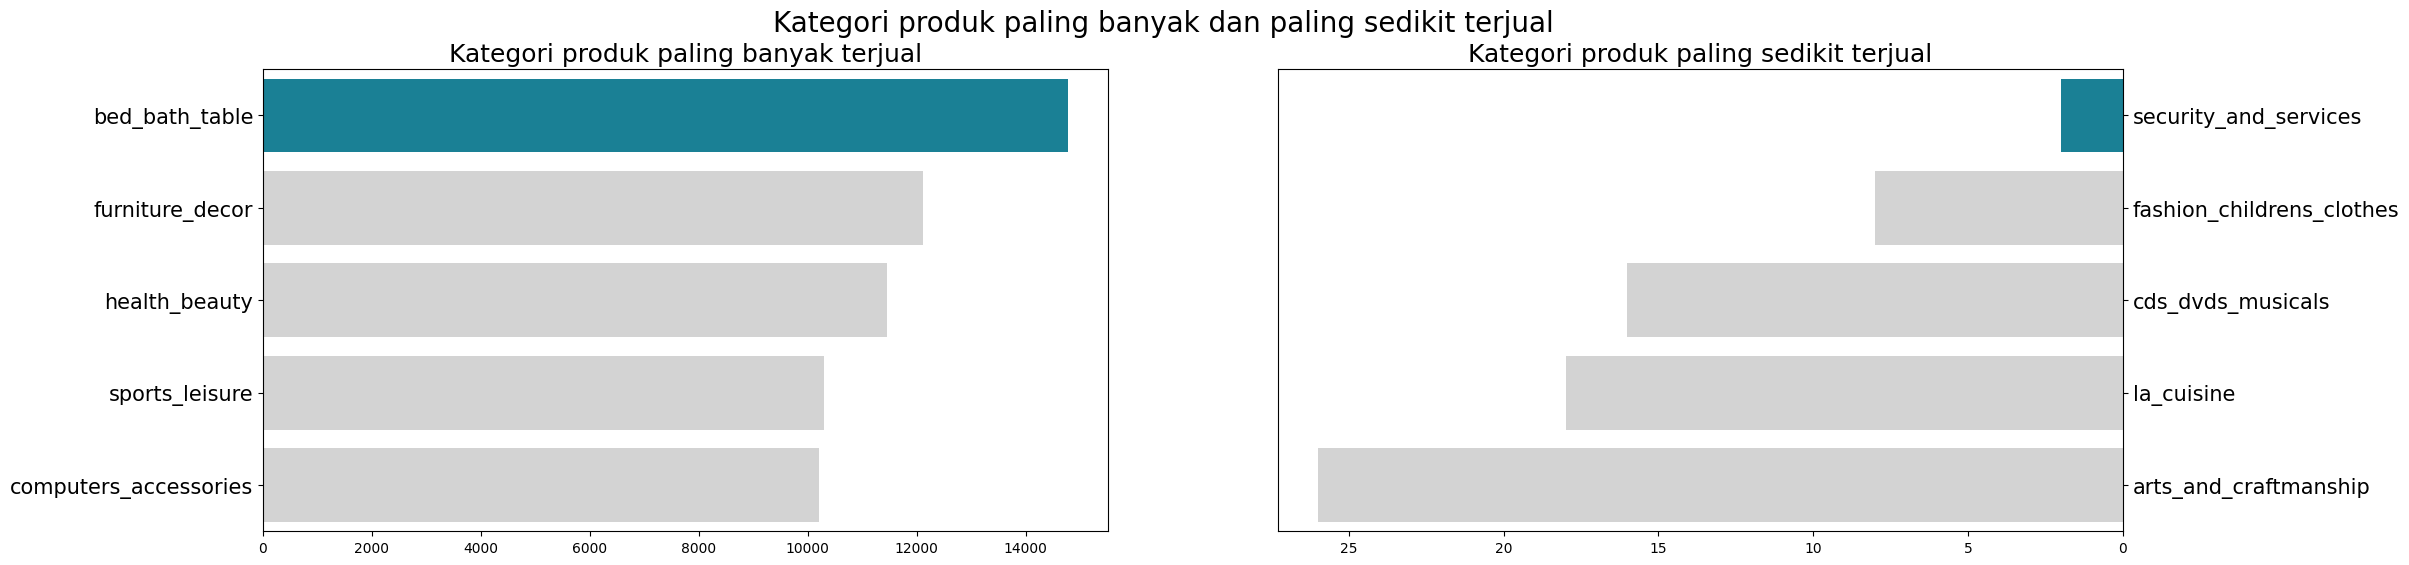

In [206]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="total_sold", y="product_category_name_english", data=most_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Kategori produk paling banyak terjual", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="total_sold", y="product_category_name_english", data=least_order_items_df.sort_values(by="total_sold", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Kategori produk paling sedikit terjual", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Kategori produk paling banyak dan paling sedikit terjual", fontsize=20)
plt.show()

**Insight**
- Dari data yang ditampilkan bahwa kategori barang terbanyak terjual adalah bed bath table
- Sedangkan Dari data yang ditampilkan bahwa kategori barang tersedikit terjual adalah security and service

### Pertanyaan 2: Bagaimana performa penjualan dan revenue dalam beberapa bulan terakhir?


In [207]:
monthly_orders_df = orders_extended_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "count",
    "payment_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
filtered_df = monthly_orders_df[monthly_orders_df["order_purchase_timestamp"].str.startswith("2017")]
monthly_orders_df

<ipython-input-207-8e242612d76c>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = orders_extended_df.resample(rule='M', on='order_purchase_timestamp').agg({


,order_purchase_timestamp,order_count,revenue
0,2016-09,5,272.46
1,2016-10,367,68334.55
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,1021,189324.99
5,2017-02,2058,343562.06
6,2017-03,3176,523492.56
7,2017-04,2840,489920.59
8,2017-05,4412,723969.75
9,2017-06,3810,602328.50


<ipython-input-208-dcddac7e7f2d>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(filtered_df["order_purchase_timestamp"], rotation=45)
<ipython-input-208-dcddac7e7f2d>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(filtered_df["order_purchase_timestamp"], rotation=45, ha="right")


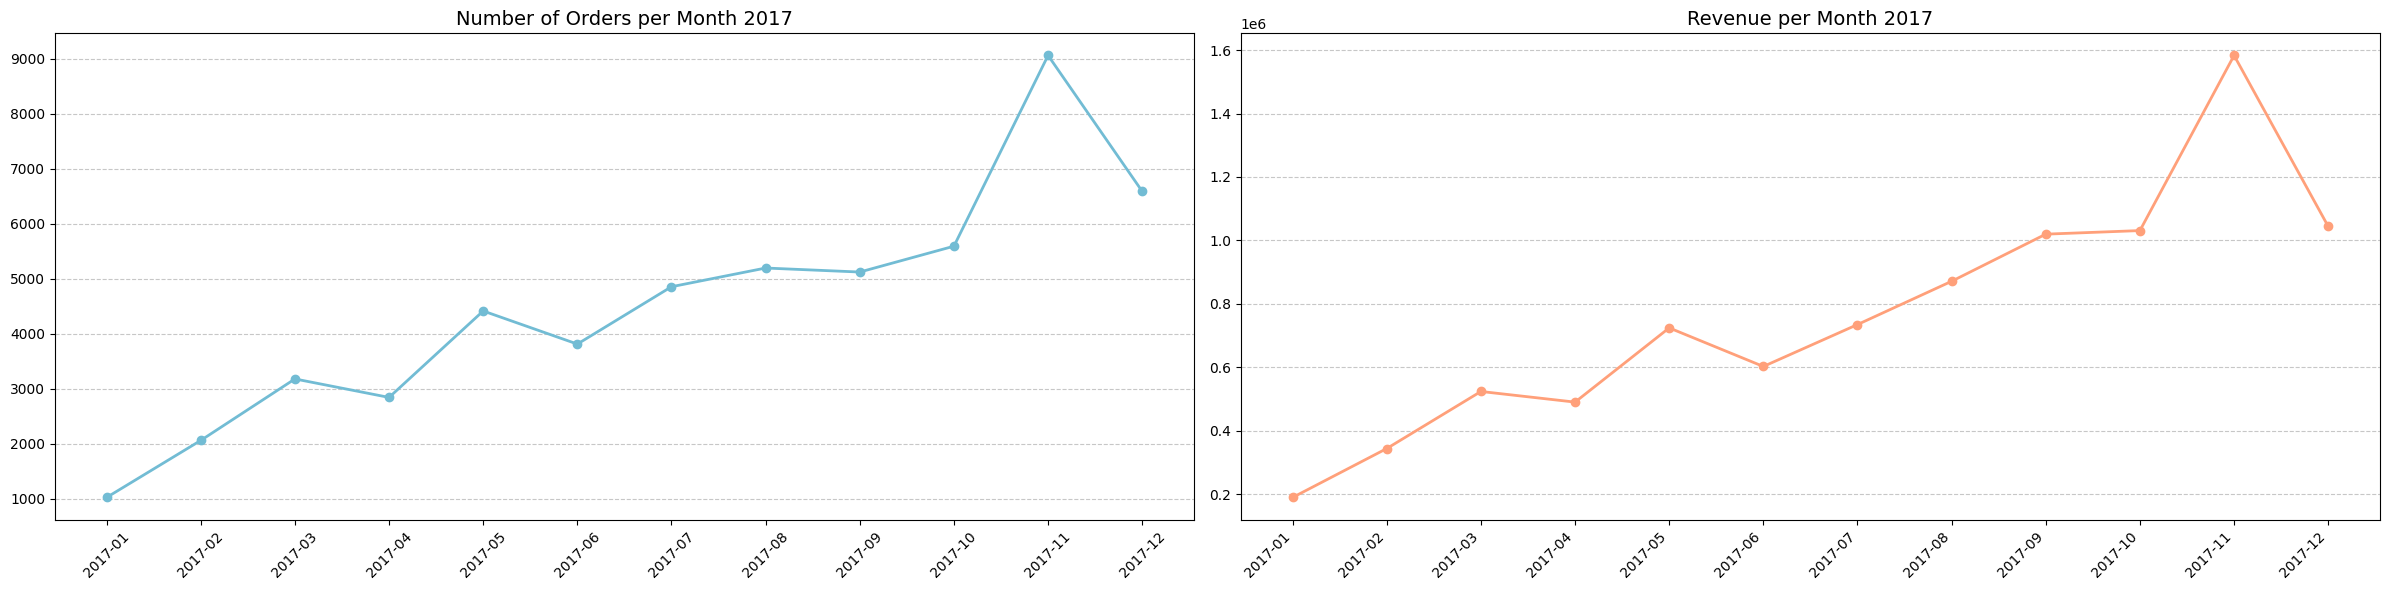

In [208]:
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

axes[0].plot(filtered_df["order_purchase_timestamp"], filtered_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
axes[0].set_title("Number of Orders per Month 2017", fontsize=14)
axes[0].set_xticklabels(filtered_df["order_purchase_timestamp"], rotation=45)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

axes[1].plot(filtered_df["order_purchase_timestamp"], filtered_df["revenue"], marker='o', linewidth=2, color="#FFA07A")
axes[1].set_title("Revenue per Month 2017", fontsize=14)
axes[1].set_xticklabels(filtered_df["order_purchase_timestamp"], rotation=45, ha="right")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

**Insight**

- Saya menghitung banyaknya baris dari order_id dan menjumlahkan payment_value lalu mengubagnya kedalam data bulan
- Saya memfilter tahun 2017 dan menghasilkan data order dan revenue dari beberapa bulan terakhir



### Pertanyaan 3: Berapa persen pelanggan yang belum melakukan pembelian dalam 3 bulan terakhir?



In [209]:
latest_date = orders_extended_df["order_purchase_timestamp"].max()
three_months_ago = latest_date - pd.DateOffset(months=3)

active_customers = orders_extended_df[orders_extended_df["order_purchase_timestamp"] >= three_months_ago]["customer_id"].unique()
total_customers = orders_extended_df["customer_id"].nunique()

inactive_customers = total_customers - len(active_customers)
inactive_percentage = (inactive_customers / total_customers) * 100

print(f"Total Pelanggan: {total_customers}")
print(f"\nPelanggan Tidak Aktif dalam 3 Bulan Terakhir: {inactive_customers} ({inactive_percentage:.2f}%)")

Total Pelanggan: 98207

Pelanggan Tidak Aktif dalam 3 Bulan Terakhir: 79749 (81.21%)


**Insight**
- Mengidentifikasi pelanggan aktif di 3 bulan terakhir
- Lalu mengurangkan data active dengan total pelanggan
- didapatkan bawah ada 79749 tidak melakukan pembelian di 3 bulan terakhir atau 81.21% dari jumlah pelanggan

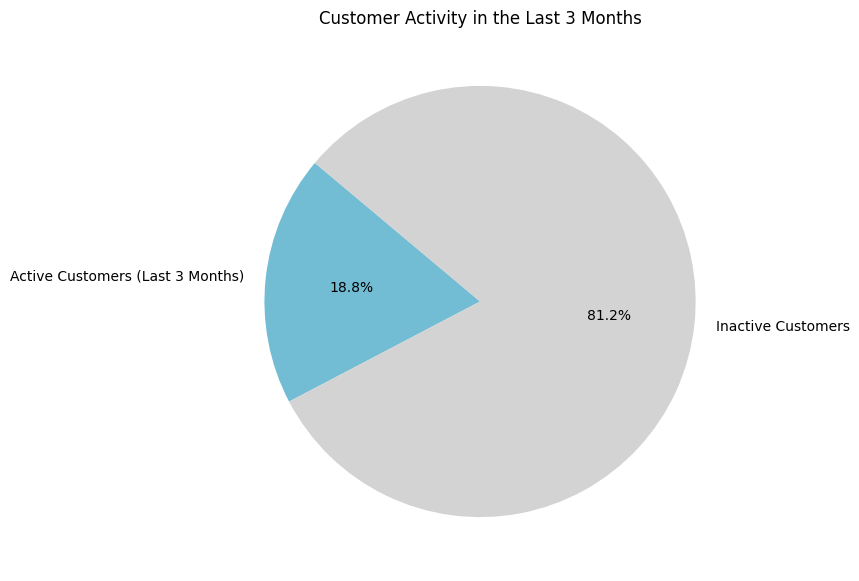

In [210]:
labels = ["Active Customers (Last 3 Months)", "Inactive Customers"]
sizes = [len(active_customers), inactive_customers]
colors = ["#72BCD4", "#D3D3D3"]

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Customer Activity in the Last 3 Months")
plt.show()

### Pertanyaan 4: Kota dan negara bagian mana yang memiliki jumlah pesanan terbanyak?


In [211]:
# Hitung jumlah pesanan per kota
city_orders = orders_extended_df.groupby("customer_city")["order_id"].nunique().reset_index()
city_orders = city_orders.rename(columns={"order_id": "total_orders"})
city_orders = city_orders.sort_values(by="total_orders", ascending=False)

# Hitung jumlah pesanan per negara bagian
state_orders = orders_extended_df.groupby("customer_state")["order_id"].nunique().reset_index()
state_orders = state_orders.rename(columns={"order_id": "total_orders"})
state_orders = state_orders.sort_values(by="total_orders", ascending=False)

# Tampilkan 10 kota & negara bagian dengan jumlah pesanan terbanyak
print("10 Kota dengan Pesanan Terbanyak:")
print(city_orders.head(10))
print("\n📌 10 Negara Bagian dengan Pesanan Terbanyak:")
print(state_orders.head(10))


10 Kota dengan Pesanan Terbanyak:
              customer_city  total_orders
3587              sao paulo         15291
3146         rio de janeiro          6801
452          belo horizonte          2737
557                brasilia          2112
1141               curitiba          1502
705                campinas          1422
2955           porto alegre          1370
3238               salvador          1234
1526              guarulhos          1167
3419  sao bernardo do campo           921

📌 10 Negara Bagian dengan Pesanan Terbanyak:
   customer_state  total_orders
25             SP         41127
18             RJ         12698
10             MG         11496
22             RS          5417
17             PR          4983
23             SC          3600
4              BA          3344
6              DF          2121
7              ES          2018
8              GO          1998


**Insight**
- Petama menghitung jumlah kota dari pelanggan
- Kedua menghitung jumlah negara bagian dari pelanggan
- Dapat disimpulkan bawah kota terbanyak memesan adalah sao paulo
- dan negara bagian yang terbanyak memesan adalah SP

<ipython-input-212-6351ef86a8d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_orders", y="customer_city", data=city_orders.head(5), palette=colors, ax=ax[0])
<ipython-input-212-6351ef86a8d3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_orders", y="customer_state", data=state_orders.head(5), palette=colors, ax=ax[1])


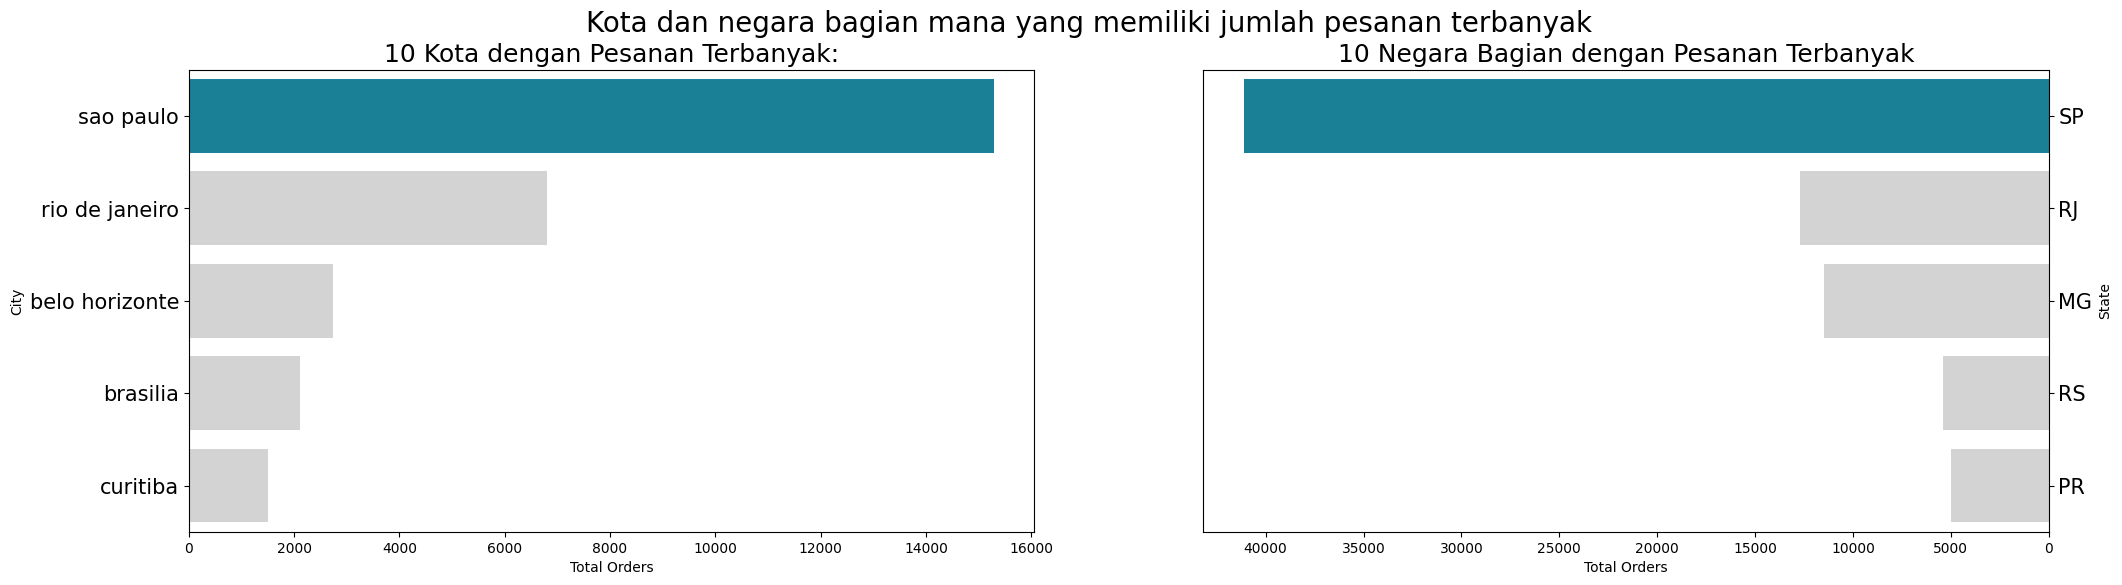

In [212]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="total_orders", y="customer_city", data=city_orders.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel("City")
ax[0].set_xlabel("Total Orders")
ax[0].set_title("10 Kota dengan Pesanan Terbanyak:", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="total_orders", y="customer_state", data=state_orders.head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel("State")
ax[1].set_xlabel("Total Orders")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("10 Negara Bagian dengan Pesanan Terbanyak", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Kota dan negara bagian mana yang memiliki jumlah pesanan terbanyak", fontsize=20)
plt.show()

In [213]:
state_count = (
    geolocation_df.groupby("geolocation_zip_code_prefix")["geolocation_state"]
    .nunique()
    .reset_index(name="state_count")
)

top_state = (
    geolocation_df.groupby(["geolocation_zip_code_prefix", "geolocation_state"])
    .size()
    .reset_index(name="freq")
    .sort_values(["geolocation_zip_code_prefix", "freq"], ascending=[True, False])
    .drop_duplicates(subset="geolocation_zip_code_prefix")
    .drop(columns=["freq"])
)

geo_summary = (
    geolocation_df.groupby(["geolocation_zip_code_prefix", "geolocation_city", "geolocation_state"])[
        ["geolocation_lat", "geolocation_lng"]
    ]
    .median()
    .reset_index()
)

geo_summary = geo_summary.merge(
    top_state, on=["geolocation_zip_code_prefix", "geolocation_state"], how="inner"
)

geo_data = customers_df.merge(
    geo_summary, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="inner"
)

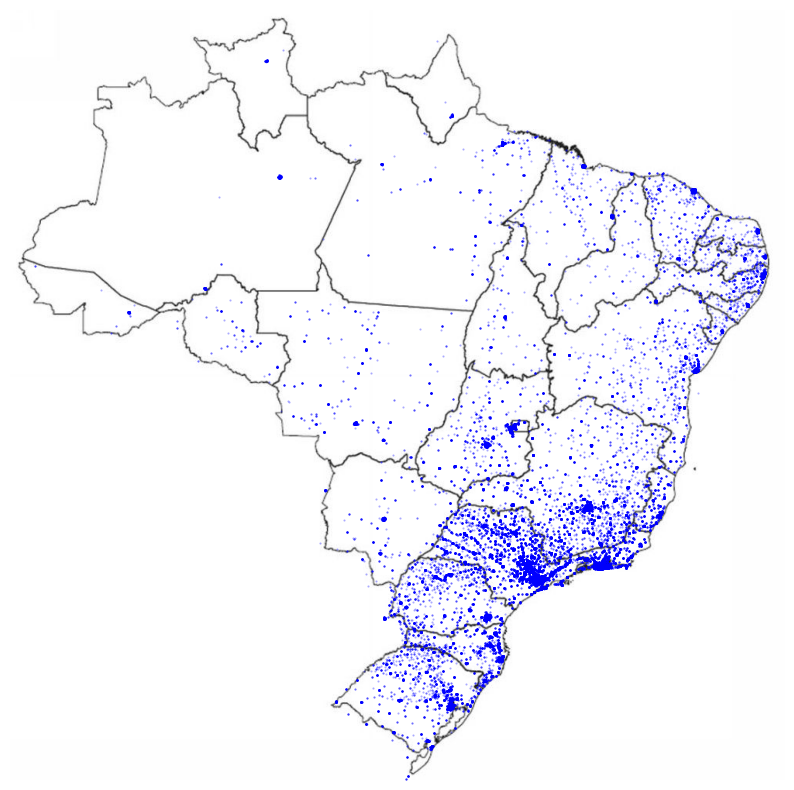

In [214]:
geo_data.to_csv("/content/BRA_adm1.csv", index=False)

# Fungsi untuk menampilkan peta Brasil dengan titik geolokasi
def plot_brazil_map(data, url):
    # Baca gambar peta dari URL
    brazil_map = mpimg.imread(urllib.request.urlopen(url), "jpg")

    # Tentukan batas koordinat peta
    extent = [-73.98, -33.8, -33.75, 5.4]  # [min_lng, max_lng, min_lat, max_lat]

    # Plot data geolokasi
    fig, ax = plt.subplots(figsize=(10, 10))
    data.plot(
        kind="scatter",
        x="geolocation_lng",
        y="geolocation_lat",
        alpha=0.3,
        s=0.3,
        color="blue",
        ax=ax,
    )

    # Tampilkan gambar peta sebagai latar belakang
    ax.imshow(brazil_map, extent=extent, aspect="auto")
    plt.axis("off")
    plt.show()

# Gunakan fungsi untuk menampilkan peta
map_url = "https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg"
plot_brazil_map(geo_data.drop_duplicates(subset="customer_unique_id"), map_url)

**Insight**
- Terlihat bahwa kota sao paulo sangat padat dengan warna biru yang menandakan jumlah pesanan disana

### Pertanyaan 5: Siapa pelanggan dengan total pembelian tertinggi?


In [215]:
customer_spending = orders_extended_df.groupby("customer_id", as_index=False)["payment_value"].sum()
customer_spending = customer_spending.merge(customers_df, on="customer_id", how="left")

customer_spending = customer_spending.sort_values(by="payment_value", ascending=False)

top_customer = customer_spending.head(5)

print("Pelanggan dengan Total Pembelian Tertinggi:")
print(top_customer[["customer_id", "customer_unique_id", "customer_city", "customer_state", "payment_value"]])


Pelanggan dengan Total Pembelian Tertinggi:
                            customer_id                customer_unique_id  \
8447   1617b1357756262bfa56ab541c47bc16  0a0a92112bd4c708ca5fde585afaa872   
72973  bd5d39761aa56689a265d95d8d32b8be  698e1cf81d01a3d389d96145f7fa6df8   
73228  be1b70680b9f9694d8c70f41fa3dc92b  c402f431464c72e27330a67f7b94d4fb   
2042   05455dfa7cd02f13d132aa7a6a9729c6  4007669dec559734d6f53e029e360987   
12256  1ff773612ab8934db89fd5afa8afe506  ef8d54b3797ea4db1d63f0ced6a906e9   

        customer_city customer_state  payment_value  
8447   rio de janeiro             RJ      109312.64  
72973         goiania             GO       45256.00  
73228       sao paulo             SP       44048.00  
2042      divinopolis             MG       36489.24  
12256  rio de janeiro             RJ       30186.00  


**Insight**
- Saya menggabungkan customer_id dengan payment_value untuk mendapatkan ID dari pelanggan siapa yang terbanyak melakukan pembelian
- Lalu menampikan ID, pelanggan id, kota, negara bagian, dan banyaknya jumplah pembelian tersebut
- Dapat disimpulkan bahwa ID dengan nomer 8af7ac63b2efbcbd88e5b11505e8098a melakukan total pembelian terbanyak yaitu 385169.59  

<ipython-input-216-d2bdd408d6ac>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


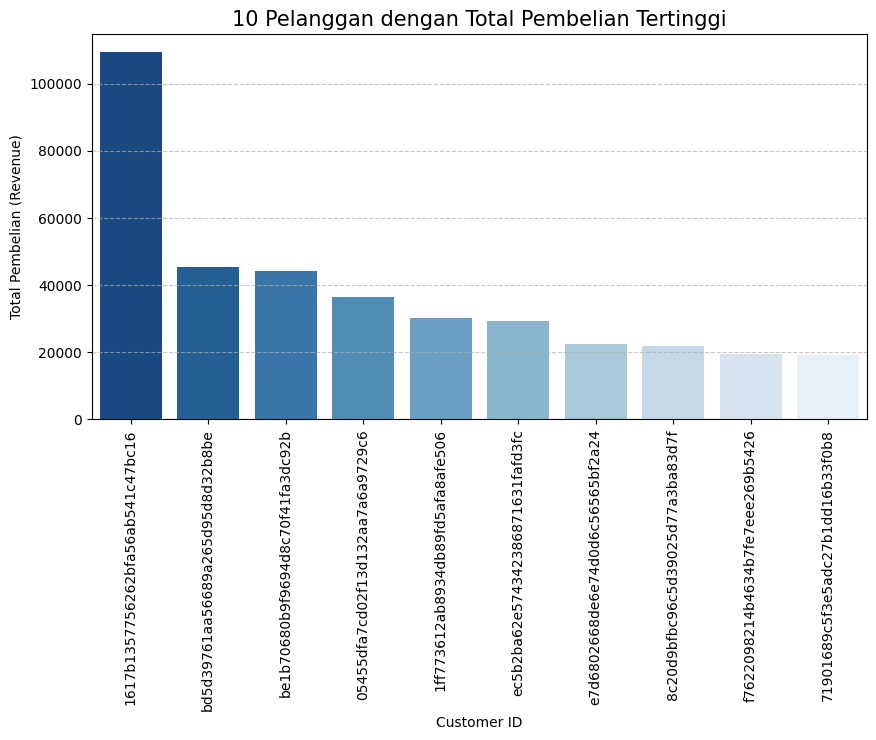

In [216]:
# Ambil 10 pelanggan dengan total pembelian tertinggi
top_10_customers = customer_spending.head(10)

# Buat bar chart
plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_10_customers["customer_id"],
    y=top_10_customers["payment_value"],
    palette="Blues_r"
)

plt.title("10 Pelanggan dengan Total Pembelian Tertinggi", fontsize=15)
plt.xlabel("Customer ID")
plt.ylabel("Total Pembelian (Revenue)")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Conclusion

- Conclution pertanyaan 1

 - Bahwa barang dengan kategori bed_bath_table paling banyak terjual yaitu sebanyak 84377

 - Bahwa barang dengan kategori security_and_services paling sedikit yaitu sebanyak 2 product



- Conclution pertanyaan 2

 - Bulan terbaik (tertinggi)
   - Order terbanyak: November (9.059 pesanan)
   - Revenue tertinggi: November (Rp 1.583.147,44)
 - Bulan terburuk (terendah)
   - Order terendah: Januari (1.021 pesanan)
   - Revenue terendah: Januari (Rp 189.324,99)

- Conclution pertanyaan 3
 - Sebanyak 81.2% pelanggan tidak aktif dalam 3 bulan terakhir, sedangkan hanya 18.8% yang masih aktif melakukan pembelian. Hal ini menunjukkan bahwa mayoritas pelanggan tidak melakukan transaksi dalam periode tersebut, sehingga perlu strategi untuk meningkatkan retensi pelanggan, seperti promo, diskon, atau program loyalitas.

- Conclution pertanyaan 4
 - Kota dengan pesanan terbanyak adalah São Paulo dengan 15.291 pesanan, jauh lebih tinggi dibandingkan kota lain.
 - Negara bagian dengan pesanan terbanyak adalah São Paulo (SP) dengan 41.127 pesanan, hampir tiga kali lipat dari negara bagian peringkat kedua, Rio de Janeiro (RJ).
 - Dominasi São Paulo menunjukkan bahwa aktivitas e-commerce paling tinggi terjadi di wilayah ini, baik dari segi kota maupun negara bagian.

- Connclution pertanyaan 5
 - Pelanggan dengan total pembelian tertinggi adalah 9af2372a1e49340278e7c1ef8d749f34 dari Cuiaba, MT, dengan total pembelian 385.169,59.
 - Mayoritas pelanggan dengan pembelian tertinggi berasal dari São Paulo (SP), menunjukkan tingginya daya beli di negara bagian tersebut.